In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

In [9]:
# Cell 1: Load Data
print("Loading data...")
df = pd.read_csv('heart.csv')



Loading data...


In [10]:
# Cell 2: Prepare Data for Model
print("Preparing data...")
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Preparing data...


In [11]:
# Cell 3: Train the Random Forest Model
print("Training the Random Forest model...")
# We are back to the original, reliable model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model training complete.")



Training the Random Forest model...
Model training complete.


In [12]:

# Cell 4: Save the Model
print("Saving the model...")
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("\nSUCCESS: 'random_forest_model.pkl' has been created.")


Saving the model...

SUCCESS: 'random_forest_model.pkl' has been created.


Evaluating on the test split...
Accuracy: 0.985
ROC-AUC: 1.000


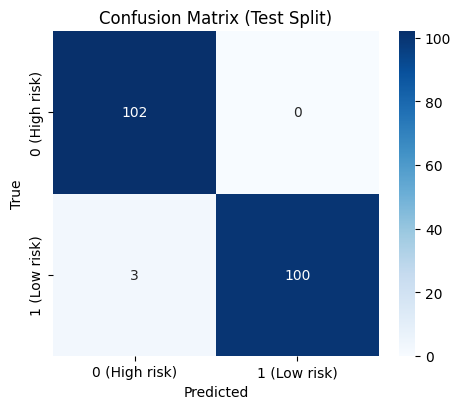

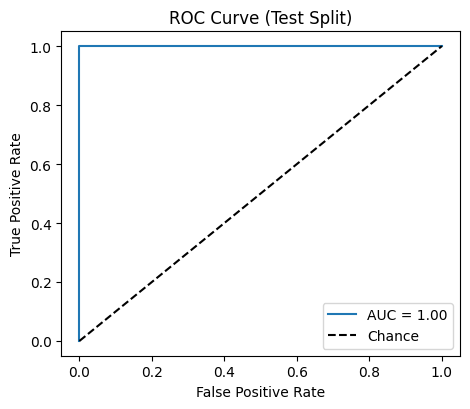

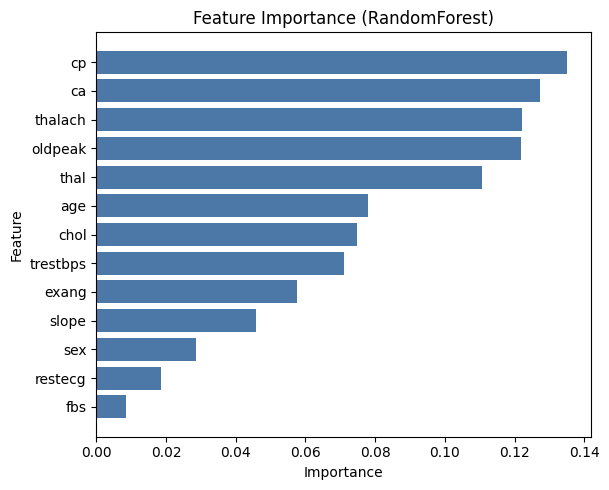

In [13]:
# Cell 5: Evaluate model (test split) and plot 3 simple visuals
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

print("Evaluating on the test split...")

# Predictions and probabilities
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # probability of class 1

# Basic metrics
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
print(f"Accuracy: {acc:.3f}")
print(f"ROC-AUC: {auc:.3f}")

# --- GRAPH 1: Confusion matrix heatmap ---
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(4.8, 4.2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["0 (High risk)", "1 (Low risk)"],
            yticklabels=["0 (High risk)", "1 (Low risk)"])
plt.title("Confusion Matrix (Test Split)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# --- GRAPH 2: ROC curve ---
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(4.8, 4.2))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], "k--", label="Chance")
plt.title("ROC Curve (Test Split)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# --- GRAPH 3: Feature importance (RandomForest) ---
if hasattr(model, "feature_importances_"):
    order = np.argsort(model.feature_importances_)
    plt.figure(figsize=(6.2, 5))
    plt.barh(np.array(X.columns)[order], model.feature_importances_[order], color="#4C78A8")
    plt.title("Feature Importance (RandomForest)")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
else:
    print("Feature importance not available for this model.")